In [1]:
import pandas as pd
import numpy as np

In [2]:
data=r'C:\Users\Student\My_iSpan\ziSpanProject_data\origin\POS_CASH_balance.csv'
dataf = pd.read_csv(data)
dataf = dataf.drop(columns=['NAME_CONTRACT_STATUS','SK_DPD_DEF'])
dataf = dataf.fillna(0)
dataf

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD
0,1803195,182943,-31,48.0,45.0,0
1,1715348,367990,-33,36.0,35.0,0
2,1784872,397406,-32,12.0,9.0,0
3,1903291,269225,-35,48.0,42.0,0
4,2341044,334279,-35,36.0,35.0,0
...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,843
10001354,1717234,141565,-19,12.0,0.0,602
10001355,1283126,315695,-21,10.0,0.0,609
10001356,1082516,450255,-22,12.0,0.0,614


In [3]:
dataf = dataf.sort_values(by=['SK_ID_PREV', 'MONTHS_BALANCE'],ascending=False)
dataf = dataf.reset_index(drop = True)
dataf

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD
0,2843499,314148,-30,10.0,0.0,0
1,2843499,314148,-31,10.0,0.0,0
2,2843499,314148,-32,60.0,51.0,0
3,2843499,314148,-33,60.0,52.0,0
4,2843499,314148,-34,60.0,54.0,0
...,...,...,...,...,...,...
10001353,1000002,101962,-53,6.0,3.0,0
10001354,1000002,101962,-54,4.0,4.0,0
10001355,1000001,158271,-8,2.0,0.0,0
10001356,1000001,158271,-9,12.0,11.0,0


In [4]:
## 概念: 尋找 '待付期數差值' < '月份差值' 者.  i.e.每月要付款一期以上, 沒付的就會有前述現象
data_t = dataf - dataf.shift(-1)
data_t

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,-50.0,-51.0,0.0
2,0.0,0.0,1.0,0.0,-1.0,0.0
3,0.0,0.0,1.0,0.0,-2.0,0.0
4,0.0,0.0,1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...
10001353,0.0,0.0,1.0,2.0,-1.0,0.0
10001354,1.0,-56309.0,-46.0,2.0,4.0,0.0
10001355,0.0,0.0,1.0,-10.0,-11.0,0.0
10001356,0.0,0.0,1.0,0.0,-1.0,0.0


In [5]:
data_t = data_t.fillna(1)
## 將因 "減到不同訂單而導致的計算錯誤" 設為 false 排除
data_t['SK_ID_PREV_t'] = (data_t['SK_ID_PREV'] == 0)
data_t = data_t.drop(columns=['SK_ID_PREV'])
## 將因 "已經付完了但還有期數紀錄而導致的錯誤" 設為 false 排除
data_t['INSTALMENT_FUTURE_t'] = (dataf['CNT_INSTALMENT_FUTURE'] > 0)
data_t

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_ID_PREV_t,INSTALMENT_FUTURE_t
0,0.0,1.0,0.0,0.0,0.0,True,False
1,0.0,1.0,-50.0,-51.0,0.0,True,False
2,0.0,1.0,0.0,-1.0,0.0,True,True
3,0.0,1.0,0.0,-2.0,0.0,True,True
4,0.0,1.0,0.0,-1.0,0.0,True,True
...,...,...,...,...,...,...,...
10001353,0.0,1.0,2.0,-1.0,0.0,True,True
10001354,-56309.0,-46.0,2.0,4.0,0.0,False,True
10001355,0.0,1.0,-10.0,-11.0,0.0,True,False
10001356,0.0,1.0,0.0,-1.0,0.0,True,True


In [6]:
## 計算期別的數據
data_t['test_INSTALMENT'] = (data_t['MONTHS_BALANCE']+data_t['CNT_INSTALMENT_FUTURE'])*data_t['SK_ID_PREV_t']*data_t['INSTALMENT_FUTURE_t'] > 0
data_t

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_ID_PREV_t,INSTALMENT_FUTURE_t,test_INSTALMENT
0,0.0,1.0,0.0,0.0,0.0,True,False,False
1,0.0,1.0,-50.0,-51.0,0.0,True,False,False
2,0.0,1.0,0.0,-1.0,0.0,True,True,False
3,0.0,1.0,0.0,-2.0,0.0,True,True,False
4,0.0,1.0,0.0,-1.0,0.0,True,True,False
...,...,...,...,...,...,...,...,...
10001353,0.0,1.0,2.0,-1.0,0.0,True,True,False
10001354,-56309.0,-46.0,2.0,4.0,0.0,False,True,False
10001355,0.0,1.0,-10.0,-11.0,0.0,True,False,False
10001356,0.0,1.0,0.0,-1.0,0.0,True,True,False


In [7]:
## 計算 SK_DPD 的數據
data_t['test_SK_DPD'] = (data_t['SK_DPD']*data_t['SK_ID_PREV_t']) > 0
data_t

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_ID_PREV_t,INSTALMENT_FUTURE_t,test_INSTALMENT,test_SK_DPD
0,0.0,1.0,0.0,0.0,0.0,True,False,False,False
1,0.0,1.0,-50.0,-51.0,0.0,True,False,False,False
2,0.0,1.0,0.0,-1.0,0.0,True,True,False,False
3,0.0,1.0,0.0,-2.0,0.0,True,True,False,False
4,0.0,1.0,0.0,-1.0,0.0,True,True,False,False
...,...,...,...,...,...,...,...,...,...
10001353,0.0,1.0,2.0,-1.0,0.0,True,True,False,False
10001354,-56309.0,-46.0,2.0,4.0,0.0,False,True,False,False
10001355,0.0,1.0,-10.0,-11.0,0.0,True,False,False,False
10001356,0.0,1.0,0.0,-1.0,0.0,True,True,False,False


In [8]:
## 併回原表
dataf['test_INSTALMENT'] = data_t['test_INSTALMENT']*1
dataf['test_SK_DPD'] = data_t['test_SK_DPD']*1
dataf

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,test_INSTALMENT,test_SK_DPD
0,2843499,314148,-30,10.0,0.0,0,0,0
1,2843499,314148,-31,10.0,0.0,0,0,0
2,2843499,314148,-32,60.0,51.0,0,0,0
3,2843499,314148,-33,60.0,52.0,0,0,0
4,2843499,314148,-34,60.0,54.0,0,0,0
...,...,...,...,...,...,...,...,...
10001353,1000002,101962,-53,6.0,3.0,0,0,0
10001354,1000002,101962,-54,4.0,4.0,0,0,0
10001355,1000001,158271,-8,2.0,0.0,0,0,0
10001356,1000001,158271,-9,12.0,11.0,0,0,0


In [9]:
dataf['late_count']=(dataf['test_INSTALMENT']+dataf['test_SK_DPD'] > 0)*1
dataf

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,test_INSTALMENT,test_SK_DPD,late_count
0,2843499,314148,-30,10.0,0.0,0,0,0,0
1,2843499,314148,-31,10.0,0.0,0,0,0,0
2,2843499,314148,-32,60.0,51.0,0,0,0,0
3,2843499,314148,-33,60.0,52.0,0,0,0,0
4,2843499,314148,-34,60.0,54.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
10001353,1000002,101962,-53,6.0,3.0,0,0,0,0
10001354,1000002,101962,-54,4.0,4.0,0,0,0,0
10001355,1000001,158271,-8,2.0,0.0,0,0,0,0
10001356,1000001,158271,-9,12.0,11.0,0,0,0,0


In [10]:
data_t2 = dataf.groupby('SK_ID_PREV',as_index = False).aggregate({'SK_ID_CURR':'max',
                                                                  'MONTHS_BALANCE':'count',
                                                                  'late_count':'sum'})
data_t2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,late_count
0,1000001,158271,3,0
1,1000002,101962,5,0
2,1000003,252457,4,0
3,1000004,260094,8,0
4,1000005,176456,11,0
...,...,...,...,...
936320,2843494,292375,3,0
936321,2843495,260963,8,0
936322,2843497,451578,21,0
936323,2843498,393881,7,0


In [11]:
data_t2['late_label'] = (dataf['late_count']>0)*1
data_t2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,late_count,late_label
0,1000001,158271,3,0,0
1,1000002,101962,5,0,0
2,1000003,252457,4,0,0
3,1000004,260094,8,0,0
4,1000005,176456,11,0,0
...,...,...,...,...,...
936320,2843494,292375,3,0,0
936321,2843495,260963,8,0,0
936322,2843497,451578,21,0,0
936323,2843498,393881,7,0,0


In [12]:
data_t2 = data_t2.groupby('SK_ID_CURR',as_index = False).aggregate({
    'SK_ID_PREV':'count',
    'MONTHS_BALANCE':'sum',
    'late_count':'sum',
    'late_label':'sum'
})
data_t2

,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,late_count,late_label
0,100001,2,9,1,0
1,100002,1,19,0,0
2,100003,3,28,0,0
3,100004,1,4,0,0
4,100005,1,11,1,0
...,...,...,...,...,...
337247,456251,1,9,1,0
337248,456252,1,7,0,0
337249,456253,3,17,1,0
337250,456254,2,20,0,0


In [13]:
data_t2.columns = ['SK_ID_CURR','Loan_count','INSTALMENT_count','late_count_total','late_count_inLoan']
data_t2

,SK_ID_CURR,Loan_count,INSTALMENT_count,late_count_total,late_count_inLoan
0,100001,2,9,1,0
1,100002,1,19,0,0
2,100003,3,28,0,0
3,100004,1,4,0,0
4,100005,1,11,1,0
...,...,...,...,...,...
337247,456251,1,9,1,0
337248,456252,1,7,0,0
337249,456253,3,17,1,0
337250,456254,2,20,0,0


In [15]:
data=r'C:\Users\Student\My_iSpan\ziSpanProject_data\processed\processed_POS_CASH_balance.csv'
data_t2.to_csv(data,index = False)

In [16]:
sum(data_t2['late_count_inLoan']>0)

31647

<AxesSubplot:>

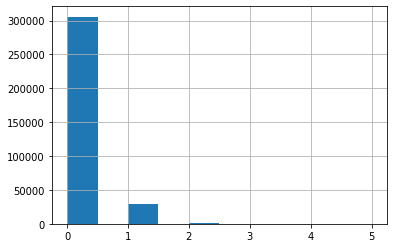

In [17]:
data_t2['late_count_inLoan'].hist()

168


<AxesSubplot:>

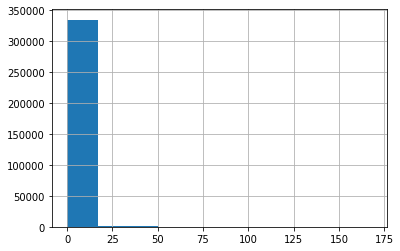

In [20]:
print(np.max(data_t2['late_count_total']))
data_t2['late_count_total'].hist()